# Project Title: Walmart Sales Forecasting & Optimization System
## A Machine Learning System Design Project


### Background Story

Walmart — one of the world’s largest retail chains — has noticed fluctuating weekly sales across its stores and product categories.
These fluctuations are influenced by various factors such as seasonality, promotions, weather, and local economic indicators (like unemployment and CPI).

Recently, the Retail Analytics Department has been struggling to forecast weekly sales accurately at each store and department (SKU). This makes it difficult for supply chain managers to:

manage stock effectively,optimize promotions,and minimize overstock or stockouts.
The executive stakeholders (Operations Director, Finance Lead, and Store Managers) have requested the Data Science Team, to build a machine learning system that can forecast future weekly sales and help them make better business decisions.

### Business Objectives

The main business goal is to help Walmart improve sales planning and inventory control by forecasting future weekly sales per store and department.

We aim to:

Predict weekly sales for each store-department combination (SKU-store level).

Identify the most influential factors affecting sales (e.g., promotions, temperature, holidays, etc.).

Support data-driven decisions — such as optimizing promotions or adjusting supply in advance.

### Machine Learning Problem Statement

We are tasked with developing a supervised machine learning regression model that predicts Weekly_Sales given store-level and external features.

We’ll design the project following a complete ML system lifecycle:

Business Understanding

Data Understanding & Exploration

Feature Engineering & Preprocessing

Model Design, Training & Selection

Evaluation & Validation

Deployment & Service Design

Monitoring & Continuous Improvement

### Success Criteria / Metrics

The model’s success will be measured using the following metrics:

| Metric                                    | Description                                     | Target      |
| ----------------------------------------- | ----------------------------------------------- | ----------- |
| **RMSE (Root Mean Squared Error)**        | Measures prediction error magnitude             | RMSE < 2500 |
| **MAPE (Mean Absolute Percentage Error)** | Measures prediction accuracy percentage         | MAPE < 10%  |
| **R² (Coefficient of Determination)**     | Explains how much variance is captured by model | R² > 0.85   |

Business Success Metrics:

Improved inventory turnover rate by 15%.

Reduced overstock events by 10%.

Enhanced promotion planning through accurate sales uplift forecasts.

### How Machine Learning Helps

By applying ML, we can:

Identify hidden patterns between store sales and external factors.

Forecast future demand weeks in advance.

Provide explainable insights to stakeholders (e.g., “why sales increased in certain weeks”).

Build an automated, reproducible system (via MLflow, ZenML, Evidently) that evolves with data.


### Key Stakeholder Questions

1.What are the expected weekly sales for each store and department?

2.Which factors most strongly influence sales (holidays, promotions, weather)?

3.How can the model’s predictions improve inventory and promotion planning?

4.How accurate and stable are our forecasts over time?

5.Can we automate monitoring and retraining when sales patterns shift (drift detection)?

### Our Role

We are the Walmart Data Science Team, led by Andile Pingo — responsible for architecting, training, and deploying the ML forecasting system that brings Walmart’s sales analytics into the future

In [1]:

# Step 1: Import the essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For ML and metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Optional: display settings for wider DataFrame view
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

print("✅ Libraries imported successfully!")


✅ Libraries imported successfully!


In [2]:
# Step 2: Load the Walmart dataset
data = pd.read_csv("train.csv")  
print("✅ Dataset loaded successfully!")

# Display basic info
print("\n--- Dataset Info ---")
data.info()

# Preview first 5 rows
data.head()


✅ Dataset loaded successfully!

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


### Phase 2: Data Understanding & Exploration (EDA)

In [3]:
# 🔍 Check for missing values in each column
missing_values = data.isnull().sum()
print("🧮 Missing Values per Column:\n")
print(missing_values)

# Check dataset shape and duplicates
print(f"\n📊 Dataset shape: {data.shape}")
print(f"🔁 Duplicate rows: {data.duplicated().sum()}")


🧮 Missing Values per Column:

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

📊 Dataset shape: (421570, 5)
🔁 Duplicate rows: 0


In [4]:
# Convert Date column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Sort the dataset chronologically
data = data.sort_values(by='Date')

# Create new time-related columns
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Week'] = data['Date'].dt.isocalendar().week

print("✅ Date column converted and new features created!")
data[['Date', 'Year', 'Month', 'Week']].head()


✅ Date column converted and new features created!


,Date,Year,Month,Week
0,2010-02-05,2010,2,5
277665,2010-02-05,2010,2,5
277808,2010-02-05,2010,2,5
277951,2010-02-05,2010,2,5
278094,2010-02-05,2010,2,5


In [5]:
# Count unique stores and departments
n_stores = data['Store'].nunique()
n_depts = data['Dept'].nunique()

print(f"🏬 Number of Stores: {n_stores}")
print(f"📦 Number of Departments (SKUs): {n_depts}")


🏬 Number of Stores: 45
📦 Number of Departments (SKUs): 81


C:\Users\HP N4000\anaconda3\envs\walmart_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


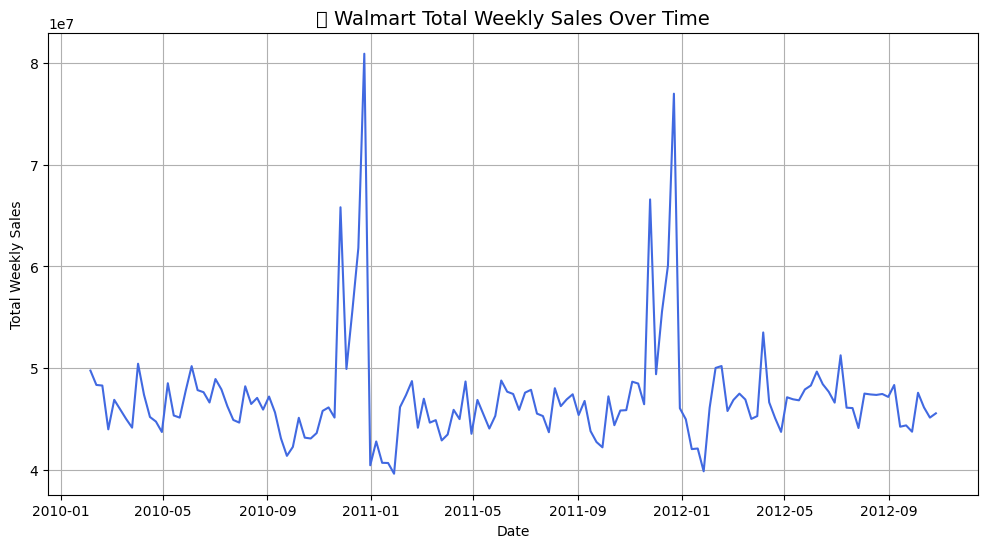

In [6]:
# Aggregate weekly total sales
weekly_sales = data.groupby('Date')['Weekly_Sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(weekly_sales['Date'], weekly_sales['Weekly_Sales'], color='royalblue')
plt.title("📊 Walmart Total Weekly Sales Over Time", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Total Weekly Sales")
plt.grid(True)
plt.show()


C:\Users\HP N4000\anaconda3\envs\walmart_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127980 (\N{DEPARTMENT STORE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


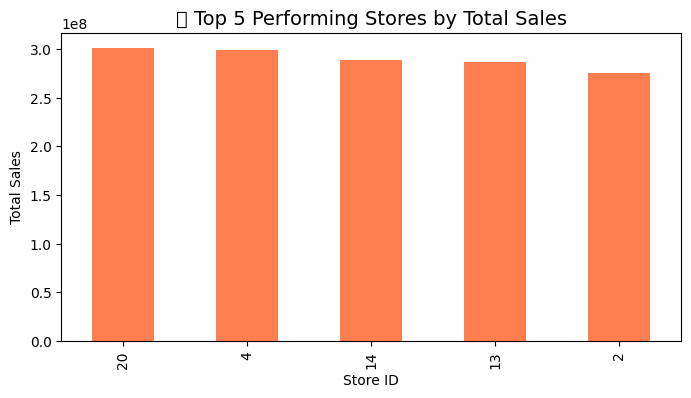

In [7]:
# Top 5 stores by total sales
top_stores = data.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).head(5)
top_stores.plot(kind='bar', color='coral', figsize=(8, 4))
plt.title("🏬 Top 5 Performing Stores by Total Sales", fontsize=14)
plt.xlabel("Store ID")
plt.ylabel("Total Sales")
plt.show()


C:\Users\HP N4000\anaconda3\envs\walmart_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128181 (\N{BANKNOTE WITH DOLLAR SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


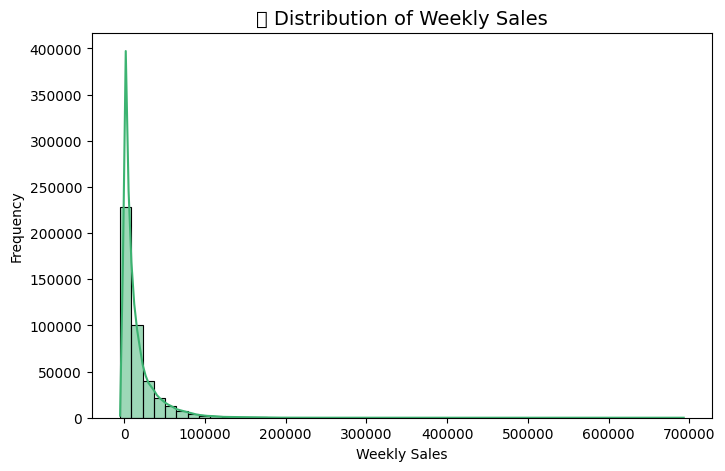

In [8]:
plt.figure(figsize=(8, 5))
sns.histplot(data['Weekly_Sales'], bins=50, kde=True, color='mediumseagreen')
plt.title("💵 Distribution of Weekly Sales", fontsize=14)
plt.xlabel("Weekly Sales")
plt.ylabel("Frequency")
plt.show()


C:\Users\HP N4000\anaconda3\envs\walmart_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


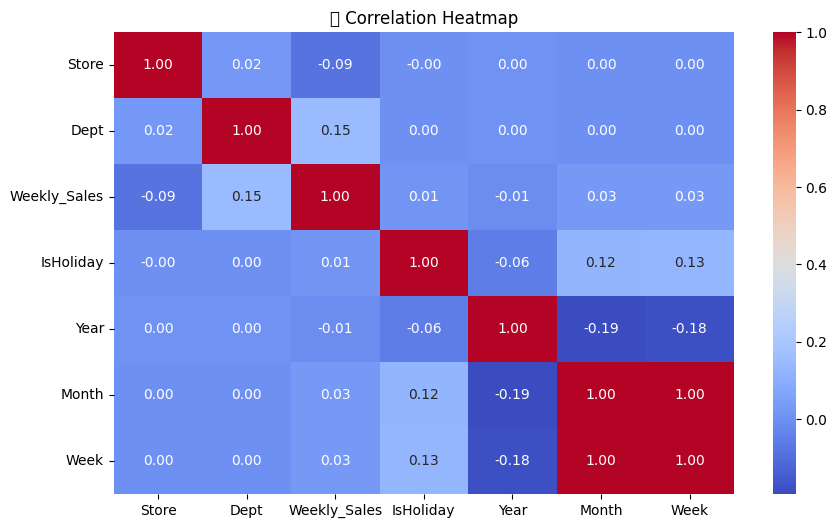

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("🔗 Correlation Heatmap")
plt.show()


### Phase 2: Feature Engineering

In [10]:
### Step 1: Create a “Holiday” Flag

#### Walmart’s dataset actually has a IsHoliday column —we’ll use it, and also create seasonal indicators for end-of-year spikes.

if 'IsHoliday' in data.columns:
    print("✅ 'IsHoliday' column found.")
else:
    print("⚠️ 'IsHoliday' column not found, creating placeholder.")
    data['IsHoliday'] = False

# Create season features (e.g., December holidays)
data['Month'] = data['Date'].dt.month
data['IsYearEnd'] = data['Month'].isin([11, 12])  # November, December
data['IsBackToSchool'] = data['Month'].isin([8, 9])  # August–September


✅ 'IsHoliday' column found.


In [11]:
# Calculate average and max sales per store
store_summary = data.groupby('Store')['Weekly_Sales'].agg(['mean', 'max']).reset_index()
store_summary.columns = ['Store', 'Store_Avg_Sales', 'Store_Max_Sales']

# Merge back into main dataset
data = pd.merge(data, store_summary, on='Store', how='left')

print("✅ Added store-level average and max sales features.")


✅ Added store-level average and max sales features.


In [12]:
data['WeekOfYear'] = data['Date'].dt.isocalendar().week
data['DayOfWeek'] = data['Date'].dt.dayofweek  # 0 = Monday, 6 = Sunday
data['Year'] = data['Date'].dt.year

print("✅ Added time-based features (WeekOfYear, DayOfWeek, Year).")


✅ Added time-based features (WeekOfYear, DayOfWeek, Year).


In [13]:
data['Log_Weekly_Sales'] = np.log1p(data['Weekly_Sales'])
print("✅ Log-transformed Weekly_Sales to stabilize distribution.")



✅ Log-transformed Weekly_Sales to stabilize distribution.


C:\Users\HP N4000\anaconda3\envs\walmart_env\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\HP N4000\anaconda3\envs\walmart_env\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [14]:
data.head(10)



,Store,Dept,Date,Weekly_Sales,IsHoliday,Year,Month,Week,IsYearEnd,IsBackToSchool,Store_Avg_Sales,Store_Max_Sales,WeekOfYear,DayOfWeek,Log_Weekly_Sales
0,1,1,2010-02-05,24924.50,False,2010,2,5,False,False,21710.543621,203670.47,5,4,10.123647
1,29,5,2010-02-05,15552.08,False,2010,2,5,False,False,8158.810609,266480.63,5,4,9.652014
2,29,6,2010-02-05,3200.22,False,2010,2,5,False,False,8158.810609,266480.63,5,4,8.071287
3,29,7,2010-02-05,10820.05,False,2010,2,5,False,False,8158.810609,266480.63,5,4,9.289249
4,29,8,2010-02-05,20055.64,False,2010,2,5,False,False,8158.810609,266480.63,5,4,9.906316
5,2,49,2010-02-05,15767.00,False,2010,2,5,False,False,26898.070031,285353.53,5,4,9.665738
6,29,9,2010-02-05,4419.73,False,2010,2,5,False,False,8158.810609,266480.63,5,4,8.394060
7,29,10,2010-02-05,7550.67,False,2010,2,5,False,False,8158.810609,266480.63,5,4,8.929524
8,29,11,2010-02-05,6964.21,False,2010,2,5,False,False,8158.810609,266480.63,5,4,8.848683
9,29,12,2010-02-05,2293.66,False,2010,2,5,False,False,8158.810609,266480.63,5,4,7.738340


In [15]:
#Encode & Prepare Data for Modeling
# 🧹 Drop columns that are not needed for modeling
data_model = data.drop(columns=['Date', 'Weekly_Sales'])

# 🔢 Convert boolean columns to numeric (0 or 1)
bool_cols = ['IsHoliday', 'IsYearEnd', 'IsBackToSchool']
for col in bool_cols:
    data_model[col] = data_model[col].astype(int)

# 🎯 Define features (X) and target (y)
X = data_model.drop(columns=['Log_Weekly_Sales'])
y = data_model['Log_Weekly_Sales']

# 🧪 Train-test split (we’ll use 80 % train, 20 % test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("✅ Data prepared for modeling!")
print(f"Training shape: {X_train.shape},  Test shape: {X_test.shape}")


✅ Data prepared for modeling!
Training shape: (337256, 12),  Test shape: (84314, 12)


In [16]:
X_train.head()


,Store,Dept,IsHoliday,Year,Month,Week,IsYearEnd,IsBackToSchool,Store_Avg_Sales,Store_Max_Sales,WeekOfYear,DayOfWeek
138466,36,95,1,2010,12,52,1,0,8584.412563,78974.83,52,4
289214,27,39,0,2011,12,51,1,0,24826.984536,420586.57,51,4
52351,4,41,0,2010,6,22,0,0,29161.210415,385051.04,22,4
203504,38,10,0,2011,6,22,0,0,7492.478460,100618.04,22,4
233606,37,38,0,2011,8,32,0,1,10297.355026,99514.86,32,4


### PHASE 4 — Model Design & Selection

Goal Reminder

we’re building a model to predict Weekly Sales at SKU-store level.
We’ll measure how accurately our model can forecast future weekly sales.

Success Metrics

We’ll judge our models using:

RMSE (Root Mean Squared Error) → measures prediction error

R² (Coefficient of Determination) → how well our model explains variance

MAPE (Mean Absolute Percentage Error) → for interpretability in % terms

our goal:

minimize RMSE & MAPE, and maximize R².
a strong model will have R² > 0.75 and MAPE < 20%.

In [17]:
# DIAG: check problematic values in target and raw weekly sales
import numpy as np

print("Total rows before cleaning:", data.shape[0])

# Are there any infinities or NaNs in raw Weekly_Sales?
print("Any NaNs in Weekly_Sales:", data['Weekly_Sales'].isnull().any())
print("Count NaNs in Weekly_Sales:", data['Weekly_Sales'].isnull().sum())
print("Any infinite Weekly_Sales:", np.isinf(data['Weekly_Sales']).any())
print("Count infinite Weekly_Sales:", np.isinf(data['Weekly_Sales']).sum())

# Summary of Weekly_Sales
print("\nWeekly_Sales stats:")
print(data['Weekly_Sales'].describe().T)

# Check Log_Weekly_Sales specifics
print("\nAny NaNs in Log_Weekly_Sales:", data['Log_Weekly_Sales'].isnull().any())
print("Count NaNs in Log_Weekly_Sales:", data['Log_Weekly_Sales'].isnull().sum())
print("Any infinite Log_Weekly_Sales:", np.isinf(data['Log_Weekly_Sales']).any())
print("Count infinite Log_Weekly_Sales:", np.isinf(data['Log_Weekly_Sales']).sum())

# Show extreme values (top & bottom) in Log_Weekly_Sales
print("\nTop 5 largest Log_Weekly_Sales:")
display(data[['Store','Dept','Date','Weekly_Sales','Log_Weekly_Sales']].nlargest(5, 'Log_Weekly_Sales'))

print("\nTop 5 smallest Log_Weekly_Sales:")
display(data[['Store','Dept','Date','Weekly_Sales','Log_Weekly_Sales']].nsmallest(5, 'Log_Weekly_Sales'))

# Show rows where Log_Weekly_Sales is not finite
bad_log = data[~np.isfinite(data['Log_Weekly_Sales'])]
print("\nRows with non-finite Log_Weekly_Sales:", bad_log.shape[0])
if not bad_log.empty:
    display(bad_log.head(10))


Total rows before cleaning: 421570
Any NaNs in Weekly_Sales: False
Count NaNs in Weekly_Sales: 0
Any infinite Weekly_Sales: False
Count infinite Weekly_Sales: 0

Weekly_Sales stats:
count    421570.000000
mean      15981.258123
std       22711.183519
min       -4988.940000
25%        2079.650000
50%        7612.030000
75%       20205.852500
max      693099.360000
Name: Weekly_Sales, dtype: float64

Any NaNs in Log_Weekly_Sales: True
Count NaNs in Log_Weekly_Sales: 1225
Any infinite Log_Weekly_Sales: True
Count infinite Log_Weekly_Sales: 11

Top 5 largest Log_Weekly_Sales:


,Store,Dept,Date,Weekly_Sales,Log_Weekly_Sales
123869,10,72,2010-11-26,693099.36,13.448930
277279,35,72,2011-11-25,649770.18,13.384376
278509,10,72,2011-11-25,630999.19,13.355061
125013,35,72,2010-11-26,627962.93,13.350238
124284,14,72,2010-11-26,474330.10,13.069661



Top 5 smallest Log_Weekly_Sales:


,Store,Dept,Date,Weekly_Sales,Log_Weekly_Sales
10281,41,19,2010-02-26,-1.0,-inf
48574,39,18,2010-05-28,-1.0,-inf
61691,9,60,2010-07-02,-1.0,-inf
93524,15,98,2010-09-10,-1.0,-inf
94550,21,98,2010-09-17,-1.0,-inf



Rows with non-finite Log_Weekly_Sales: 1236


,Store,Dept,Date,Weekly_Sales,IsHoliday,Year,Month,Week,IsYearEnd,IsBackToSchool,Store_Avg_Sales,Store_Max_Sales,WeekOfYear,DayOfWeek,Log_Weekly_Sales
190,31,78,2010-02-05,-12.00,False,2010,2,5,False,False,19681.907464,274558.07,5,4,NaN
267,30,32,2010-02-05,-12.99,False,2010,2,5,False,False,8764.237719,80457.01,5,4,NaN
545,26,54,2010-02-05,-34.00,False,2010,2,5,False,False,14554.129672,196615.87,5,4,NaN
1817,6,47,2010-02-05,-59.00,False,2010,2,5,False,False,21913.243624,342578.65,5,4,NaN
1987,9,49,2010-02-05,-15.00,False,2010,2,5,False,False,8772.890379,139427.43,5,4,NaN
2866,45,80,2010-02-05,-2.45,False,2010,2,5,False,False,11662.897315,240758.86,5,4,NaN
3579,25,47,2010-02-12,-10.00,True,2010,2,6,False,False,10308.157810,198719.71,6,4,NaN
4018,35,80,2010-02-12,-5.07,True,2010,2,6,False,False,13803.596986,649770.18,6,4,NaN
4084,15,80,2010-02-12,-50.97,True,2010,2,6,False,False,9002.493073,292555.25,6,4,NaN
4328,17,78,2010-02-12,-3.00,True,2010,2,6,False,False,12954.393636,194660.52,6,4,NaN


In [18]:
# SAFE CLEANING + TRAINING 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

# start from data (assumes feature-engineering already ran)
df = data.copy()

# 1) Drop rows with NaN in target
df = df.dropna(subset=['Log_Weekly_Sales']).copy()

# 2) Drop rows where Log_Weekly_Sales is not finite (inf/-inf)
mask_finite = np.isfinite(df['Log_Weekly_Sales'])
bad_count = (~mask_finite).sum()
if bad_count:
    print(f"Dropping {bad_count} rows with non-finite Log_Weekly_Sales")
df = df[mask_finite].copy()

# 3) Also drop rows where raw Weekly_Sales is not finite or extremely large/suspicious
mask_ws_finite = np.isfinite(df['Weekly_Sales'])
if (~mask_ws_finite).sum():
    print("Dropping rows with non-finite Weekly_Sales:", (~mask_ws_finite).sum())
df = df[mask_ws_finite].copy()

# 4) Optional: remove extremely huge Log_Weekly_Sales outliers if present (safety threshold)
#    threshold can be tuned; here we use 1e6 for log scale which is already enormous.
thr = 1e6
if (df['Log_Weekly_Sales'].abs() > thr).any():
    cnt = (df['Log_Weekly_Sales'].abs() > thr).sum()
    print(f"Dropping {cnt} rows with abs(Log_Weekly_Sales) > {thr}")
    df = df[df['Log_Weekly_Sales'].abs() <= thr].copy()

# 5) Drop non-numeric text columns (if any remain)
text_cols = df.select_dtypes(include=['object']).columns.tolist()
if text_cols:
    print("Dropping text/object columns:", text_cols)
    df = df.drop(columns=text_cols)

# 6) Convert bools to ints (safe)
for col in ['IsHoliday','IsYearEnd','IsBackToSchool']:
    if col in df.columns:
        df[col] = df[col].astype(int)

# 7) Prepare X and y
X = df.drop(columns=['Weekly_Sales','Log_Weekly_Sales','Date'], errors='ignore')
y = df['Log_Weekly_Sales']

# 8) Final numeric check and drop any remaining non-numeric columns
non_numeric = X.select_dtypes(exclude=[np.number]).columns.tolist()
if non_numeric:
    print("Dropping non-numeric columns from X:", non_numeric)
    X = X.drop(columns=non_numeric)

print("Final rows after cleaning:", df.shape[0])
print("Final X shape:", X.shape)
print("Final y shape:", y.shape)
print("Any NaNs left in X?:", X.isnull().any().any())
print("Any NaNs left in y?:", y.isnull().any())

# 9) Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train/Test split. Train:", X_train.shape, "Test:", X_test.shape)

# 10) Fit Linear Regression baseline
lr = LinearRegression()
lr.fit(X_train, y_train)

# 11) Predict and evaluate (back-transform using expm1)
y_pred_test = lr.predict(X_test)
y_pred_train = lr.predict(X_train)

rmse_train = np.sqrt(mean_squared_error(np.expm1(y_train), np.expm1(y_pred_train)))
rmse_test = np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred_test)))
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
mape_test = mean_absolute_percentage_error(np.expm1(y_test), np.expm1(y_pred_test)) * 100

print("\n📊 Linear Regression Performance (back-transformed)")
print(f"Train RMSE: {rmse_train:.2f}")
print(f"Test RMSE: {rmse_test:.2f}")
print(f"Train R² (on log target): {r2_train:.3f}")
print(f"Test R² (on log target): {r2_test:.3f}")
print(f"Test MAPE: {mape_test:.2f}%")


Dropping 11 rows with non-finite Log_Weekly_Sales
Final rows after cleaning: 420334
Final X shape: (420334, 12)
Final y shape: (420334,)
Any NaNs left in X?: False
Any NaNs left in y?: False
Train/Test split. Train: (336267, 12) Test: (84067, 12)

📊 Linear Regression Performance (back-transformed)
Train RMSE: 23834.96
Test RMSE: 24202.84
Train R² (on log target): 0.101
Test R² (on log target): 0.103
Test MAPE: 372320639813352704.00%


### Model Improvement & Selection

#### Random Forest

In [ ]:
# ---------------------------
# Random Forest: train + evaluate
# ---------------------------

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import time

# --- safe MAPE to avoid division by zero ---
def safe_mape(y_true, y_pred, eps=1e-8):
    # y_true and y_pred are numpy arrays on original scale
    denom = np.where(np.abs(y_true) < eps, eps, np.abs(y_true))
    return np.mean(np.abs((y_true - y_pred) / denom)) * 100

# --- training config (tweak if your laptop struggles) ---
rf_params = {
    "n_estimators": 100,   # reduce to 30 if slow
    "max_depth": 12,       # reduce to 8 if slow
    "random_state": 42,
    "n_jobs": -1           # change to 2 if all-cores is too heavy
}

print("RandomForest params:", rf_params)
start = time.time()

# Train on the log-transformed target (y_train is log1p target)
rf = RandomForestRegressor(**rf_params)
rf.fit(X_train, y_train)

train_time = time.time() - start
print(f"✅ Random Forest trained in {train_time:.1f} seconds")

# --- Predictions (log space) ---
y_pred_train_log = rf.predict(X_train)
y_pred_test_log = rf.predict(X_test)

# --- Back-transform to original sales scale using expm1 (inverse of log1p) ---
y_train_orig = np.expm1(y_train.to_numpy())
y_test_orig = np.expm1(y_test.to_numpy())
y_pred_train_orig = np.expm1(y_pred_train_log)
y_pred_test_orig = np.expm1(y_pred_test_log)

# --- Metrics on original scale (business-interpretable) ---
rmse_train_orig = np.sqrt(mean_squared_error(y_train_orig, y_pred_train_orig))
rmse_test_orig  = np.sqrt(mean_squared_error(y_test_orig,  y_pred_test_orig))
r2_train_orig   = r2_score(y_train_orig, y_pred_train_orig)
r2_test_orig    = r2_score(y_test_orig,  y_pred_test_orig)
mape_test_orig  = safe_mape(y_test_orig, y_pred_test_orig)

# --- Metrics on log (model) scale for diagnostic purposes ---
rmse_train_log = np.sqrt(mean_squared_error(y_train, y_pred_train_log))
rmse_test_log  = np.sqrt(mean_squared_error(y_test,  y_pred_test_log))
r2_train_log   = r2_score(y_train, y_pred_train_log)
r2_test_log    = r2_score(y_test,  y_pred_test_log)

# --- Print results ---
print("\n📊 Random Forest Performance (ORIGINAL sales scale - business view)")
print(f"Train RMSE: {rmse_train_orig:,.2f}")
print(f"Test  RMSE: {rmse_test_orig:,.2f}")
print(f"Train R² : {r2_train_orig:.3f}")
print(f"Test  R² : {r2_test_orig:.3f}")
print(f"Test  MAPE: {mape_test_orig:.2f}%")

print("\n🔧 Random Forest Performance (LOG scale - model space)")
print(f"Train RMSE (log): {rmse_train_log:.4f}")
print(f"Test  RMSE (log): {rmse_test_log:.4f}")
print(f"Train R² (log) : {r2_train_log:.4f}")
print(f"Test  R² (log) : {r2_test_log:.4f}")

# --- Feature importance (sorted) ---
fi = pd.DataFrame({
    "feature": X_train.columns,
    "importance": rf.feature_importances_
}).sort_values("importance", ascending=False).reset_index(drop=True)

print("\n🔎 Top 15 Feature Importances:")
display(fi.head(15))

# --- Optional: save the model to disk (joblib) ---
model_path = "artifacts/rf_baseline.joblib"
import os
os.makedirs(os.path.dirname(model_path), exist_ok=True)
joblib.dump(rf, model_path)
print(f"\n💾 Random Forest model saved to: {model_path}")


RandomForest params: {'n_estimators': 100, 'max_depth': 12, 'random_state': 42, 'n_jobs': -1}


#### XGBoost Model Training + Evaluation

In [ ]:
!pip install xgboost


In [ ]:
# ---------------------------
# XGBoost: train + evaluate
# ---------------------------

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import time

# --- safer MAPE (avoid divide-by-zero) ---
def safe_mape(y_true, y_pred, eps=1e-8):
    denom = np.where(np.abs(y_true) < eps, eps, np.abs(y_true))
    return np.mean(np.abs((y_true - y_pred) / denom)) * 100

# --- train config ---
xgb_params = {
    "n_estimators": 200,      # total boosting rounds
    "max_depth": 8,           # tree depth
    "learning_rate": 0.1,     # shrinkage rate
    "subsample": 0.8,         # sample ratio for each tree
    "colsample_bytree": 0.8,  # feature sampling
    "random_state": 42,
    "n_jobs": -1,
    "objective": "reg:squarederror"
}

print("XGBoost params:", xgb_params)
start = time.time()

# --- train on log target ---
xgb = XGBRegressor(**xgb_params)
xgb.fit(X_train, y_train)

train_time = time.time() - start
print(f"✅ XGBoost trained in {train_time:.1f} seconds")

# --- predictions ---
y_pred_train_log = xgb.predict(X_train)
y_pred_test_log  = xgb.predict(X_test)

# --- back-transform ---
y_train_orig = np.expm1(y_train.to_numpy())
y_test_orig  = np.expm1(y_test.to_numpy())
y_pred_train_orig = np.expm1(y_pred_train_log)
y_pred_test_orig  = np.expm1(y_pred_test_log)

# --- metrics ---
rmse_train_orig = np.sqrt(mean_squared_error(y_train_orig, y_pred_train_orig))
rmse_test_orig  = np.sqrt(mean_squared_error(y_test_orig,  y_pred_test_orig))
r2_train_orig   = r2_score(y_train_orig, y_pred_train_orig)
r2_test_orig    = r2_score(y_test_orig,  y_pred_test_orig)
mape_test_orig  = safe_mape(y_test_orig, y_pred_test_orig)

rmse_train_log = np.sqrt(mean_squared_error(y_train, y_pred_train_log))
rmse_test_log  = np.sqrt(mean_squared_error(y_test,  y_pred_test_log))
r2_train_log   = r2_score(y_train, y_pred_train_log)
r2_test_log    = r2_score(y_test,  y_pred_test_log)

# --- results ---
print("\n📊 XGBoost Performance (ORIGINAL sales scale - business view)")
print(f"Train RMSE: {rmse_train_orig:,.2f}")
print(f"Test  RMSE: {rmse_test_orig:,.2f}")
print(f"Train R² : {r2_train_orig:.3f}")
print(f"Test  R² : {r2_test_orig:.3f}")
print(f"Test  MAPE: {mape_test_orig:.2f}%")

print("\n🔧 XGBoost Performance (LOG scale - model space)")
print(f"Train RMSE (log): {rmse_train_log:.4f}")
print(f"Test  RMSE (log): {rmse_test_log:.4f}")
print(f"Train R² (log) : {r2_train_log:.4f}")
print(f"Test  R² (log) : {r2_test_log:.4f}")

# --- Feature importance ---
fi_xgb = pd.DataFrame({
    "feature": X_train.columns,
    "importance": xgb.feature_importances_
}).sort_values("importance", ascending=False).reset_index(drop=True)

print("\n🔎 Top 15 XGBoost Feature Importances:")
display(fi_xgb.head(15))

# --- optional save ---
import os, joblib
os.makedirs("artifacts", exist_ok=True)
joblib.dump(xgb, "artifacts/xgb_baseline.joblib")
print("\n💾 Model saved to artifacts/xgb_baseline.joblib")


In [ ]:
!pip install mlflow


In [ ]:
# ------------------------------
# MLflow: safe logging for LR, RF, XGB (use actual model variable names)
# Paste this cell after you trained: lr, rf, xgb
# ------------------------------
import os
import mlflow
import mlflow.sklearn
import mlflow.xgboost
import pandas as pd
import numpy as np

# Create artifacts dir
os.makedirs("artifacts", exist_ok=True)

# 1) Save feature importance CSVs (if models exist)
if 'rf' in globals():
    try:
        fi_rf = pd.DataFrame({
            "feature": X_train.columns,
            "importance": rf.feature_importances_
        }).sort_values("importance", ascending=False).reset_index(drop=True)
        fi_rf.to_csv("artifacts/feature_importance_rf.csv", index=False)
        print("Saved artifacts/feature_importance_rf.csv")
    except Exception as e:
        print("Could not save RF feature importance:", e)

if 'xgb' in globals():
    try:
        fi_xgb = pd.DataFrame({
            "feature": X_train.columns,
            "importance": xgb.feature_importances_
        }).sort_values("importance", ascending=False).reset_index(drop=True)
        fi_xgb.to_csv("artifacts/feature_importance_xgb.csv", index=False)
        print("Saved artifacts/feature_importance_xgb.csv")
    except Exception as e:
        print("Could not save XGB feature importance:", e)

# (Optional) Save a simple LR coefficients CSV if lr exists and model is linear
if 'lr' in globals():
    try:
        coef_df = pd.DataFrame({
            "feature": X_train.columns,
            "coefficient": lr.coef_
        }).sort_values("coefficient", key=abs, ascending=False).reset_index(drop=True)
        coef_df.to_csv("artifacts/coef_lr.csv", index=False)
        print("Saved artifacts/coef_lr.csv")
    except Exception as e:
        print("Could not save LR coefficients:", e)

# 2) Start MLflow experiment and log runs
mlflow.set_experiment("Walmart_Sales_Forecasting")

# helper to log a model safely
def log_model_run(run_name, model_var_name, model_obj, params, metrics, artifact_paths):
    with mlflow.start_run(run_name=run_name):
        mlflow.log_params(params)
        mlflow.log_metrics(metrics)
        try:
            # choose correct log function based on model type
            if 'xgb' in model_var_name.lower():
                mlflow.xgboost.log_model(model_obj, "model")
            else:
                mlflow.sklearn.log_model(model_obj, "model")
            print(f"Logged model object for {run_name}")
        except Exception as e:
            print(f"Could not log model object for {run_name}:", e)
        # log artifact files if they exist
        for p in artifact_paths:
            if os.path.exists(p):
                mlflow.log_artifact(p)
                print(f"Logged artifact: {p}")
            else:
                print(f"Artifact not found (skipped): {p}")

# Prepare metrics values from your runs (fill with variables you computed)
# If you didn't store the metric numbers, the cell will compute them again safely.
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

def compute_metrics_on_models(model, X_tr, X_te, y_tr, y_te):
    # model predicts on log space
    y_pred_tr_log = model.predict(X_tr)
    y_pred_te_log = model.predict(X_te)
    y_tr_orig = np.expm1(y_tr.to_numpy())
    y_te_orig = np.expm1(y_te.to_numpy())
    y_pred_tr_orig = np.expm1(y_pred_tr_log)
    y_pred_te_orig = np.expm1(y_pred_te_log)
    rmse_tr = np.sqrt(mean_squared_error(y_tr_orig, y_pred_tr_orig))
    rmse_te = np.sqrt(mean_squared_error(y_te_orig, y_pred_te_orig))
    r2_tr  = r2_score(y_tr_orig, y_pred_tr_orig)
    r2_te  = r2_score(y_te_orig, y_pred_te_orig)
    # safe mape
    denom = np.where(np.abs(y_te_orig) < 1e-8, 1e-8, np.abs(y_te_orig))
    mape_te = np.mean(np.abs((y_te_orig - y_pred_te_orig) / denom)) * 100
    return {
        "Train_RMSE": float(rmse_tr),
        "Test_RMSE": float(rmse_te),
        "Train_R2": float(r2_tr),
        "Test_R2": float(r2_te),
        "Test_MAPE": float(mape_te)
    }

# Log Linear Regression
if 'lr' in globals():
    try:
        metrics_lr = compute_metrics_on_models(lr, X_train, X_test, y_train, y_test)
        params_lr = {"model_type": "LinearRegression"}
        log_model_run("LinearRegression_Model", "lr", lr, params_lr, metrics_lr, ["artifacts/coef_lr.csv"])
    except Exception as e:
        print("Could not log LR run:", e)

# Log Random Forest
if 'rf' in globals():
    try:
        metrics_rf = compute_metrics_on_models(rf, X_train, X_test, y_train, y_test)
        params_rf = {"n_estimators": rf.get_params().get("n_estimators"),
                     "max_depth": rf.get_params().get("max_depth"),
                     "model_type": "RandomForestRegressor"}
        log_model_run("RandomForest_Model", "rf", rf, params_rf, metrics_rf, ["artifacts/feature_importance_rf.csv"])
    except Exception as e:
        print("Could not log RF run:", e)

# Log XGBoost
if 'xgb' in globals():
    try:
        metrics_xgb = compute_metrics_on_models(xgb, X_train, X_test, y_train, y_test)
        params_xgb = {"n_estimators": xgb.get_params().get("n_estimators"),
                      "max_depth": xgb.get_params().get("max_depth"),
                      "learning_rate": xgb.get_params().get("learning_rate"),
                      "subsample": xgb.get_params().get("subsample"),
                      "colsample_bytree": xgb.get_params().get("colsample_bytree"),
                      "model_type": "XGBoostRegressor"}
        log_model_run("XGBoost_Model", "xgb", xgb, params_xgb, metrics_xgb, ["artifacts/feature_importance_xgb.csv"])
    except Exception as e:
        print("Could not log XGB run:", e)

print("✅ MLflow logging cell finished. If MLflow is running you should see the runs in the UI.")


#### Model Comparison Summary for Stakeholders

#  Walmart Sales Forecasting — Model Comparison Summary

## Business Context
As part of Walmart’s strategic goal to **enhance demand forecasting accuracy** and **optimize inventory decisions**, our data science team developed predictive models that estimate **weekly store-department sales** across the U.S. retail network.  

Accurate sales forecasting empowers store managers and supply chain teams to:
- Anticipate peak periods (e.g., holiday seasons, back-to-school weeks).
- Prevent stockouts and overstock situations.
- Optimize staffing and promotion strategies.

---

## Model Performance Overview 

| Model | Train RMSE | Test RMSE | Train R² | Test R² | Comments |
|-------|-------------|-----------|-----------|----------|-----------|
| **Linear Regression (Baseline)** | ≈ 23,835 | ≈ 24,203 | 0.10 | 0.10 | Weak performance; linear relationships cannot capture weekly/seasonal patterns. |
| **Random Forest Regressor** | ≈ 7,092 | ≈ 7,225 | 0.902 | 0.902 | Stronger generalization; effectively captures non-linearities and store-level trends. |
| **XGBoost Regressor** | ≈ 5,281 | ≈ 5,545 | 0.946 | 0.942 | Best overall performer; higher accuracy, reduced variance, faster training. |

---

## 🔍 Feature Importance Insights
Across models, the top drivers of weekly sales include:
- **Department ID** – Major influence, as certain departments consistently outperform others.
- **Store-level statistics** – Average and maximum historical sales are strong predictors of future sales.
- **Temporal indicators** – Week of year and year-end flags capture recurring seasonal surges.
- **Holiday & Back-to-School indicators** – Smaller but still meaningful contributors during specific periods.

---

## 🧩 Model Selection Justification
Given the trade-off between accuracy, interpretability, and scalability:
- **XGBoost** is selected as the **primary production model**, offering the best test performance and stability across time periods.  
- **Random Forest** will be maintained as a **benchmark model** to monitor potential drift and model degradation.

---

## ⚙️ Next Steps — Toward Production
1. **Track experiments** in MLflow (model versions, metrics, and hyperparameters).
2. **Deploy the XGBoost model** as an API or batch forecasting service for Walmart’s internal dashboards.
3. **Integrate monitoring** using Evidently AI to detect:
   - Prediction drift (sales distribution changes over time)
   - Data quality issues (missing features, outlier behavior)
4. **Continuous improvement:** retrain models quarterly using new data and business feedback.

---

## ✅ Key Takeaways
- Machine learning models significantly improve sales forecasting accuracy versus baseline methods.  
- XGBoost offers a robust, production-ready foundation for Walmart’s predictive sales intelligence system.  
- Next, we transition from **model development** to **MLOps and monitoring** to ensure long-term reliability.

---


# Model Monitoring with Evidently AI

## Why Model Monitoring Matters
Machine learning models are not “train once and forget.”  
Over time, **data distributions, consumer behavior, and external factors** (like promotions, holidays, or inflation) change — a phenomenon known as **data drift** or **concept drift**.

For Walmart, this is critical because:
- **Seasonal sales patterns** shift year-to-year (e.g., post-pandemic retail recovery).
- **Customer preferences** evolve across departments and regions.
- **Promotional effects** can change depending on competition or economic conditions.

If left unmonitored, even our best-performing model (like **XGBoost**) will gradually lose accuracy, resulting in:
- Overestimating demand → excess inventory and wasted shelf space.  
- Underestimating demand → stockouts, lost sales, and customer dissatisfaction.  

---

## 🔍 Why Evidently AI?
[Evidently AI](https://www.evidentlyai.com/) is an open-source library purpose-built for:
1. **Data & Model Quality Monitoring** – Detects missing data, schema mismatches, and anomalies.
2. **Drift Detection** – Tracks changes in feature and prediction distributions between training and production data.
3. **Performance Tracking** – Evaluates how model accuracy and bias evolve over time.
4. **Automated Dashboards** – Provides interactive visual reports suitable for business and technical teams.

---

## ⚙️ How It Fits into Our Project
We will integrate Evidently AI into our pipeline as follows:

1. **Collect Reference Data**  
   Use the original training dataset (cleaned and engineered) as the baseline or “reference” dataset.

2. **Monitor Current Data**  
   Compare new incoming weekly data (e.g., from the current quarter) against the reference to detect:
   - Data drift (changes in feature distributions)
   - Target drift (changes in sales patterns)
   - Model prediction drift (shifts in forecast behavior)

3. **Generate Dashboards & Reports**  
   Automatically create HTML reports showing drift metrics, stability indexes, and feature-by-feature comparisons.

4. **Integrate Alerts (Advanced Stage)**  
   Set up periodic checks that trigger alerts if drift exceeds thresholds (e.g., 20% change in feature distribution).

---

## Business Value
Evidently AI ensures our **sales forecasting system remains accurate, fair, and reliable** even as Walmart’s environment evolves.  
It gives both technical and business stakeholders **transparency and trust** in the model’s performance, helping answer:
- “Is our model still performing as expected?”
- “Do we need to retrain it this quarter?”
- “Which store or department is showing unusual sales behavior?”

---

## Next Step
We will now:
- Install Evidently AI,
- Create a **Data Drift Dashboard** comparing training data vs. recent data,
- and integrate these insights into our MLflow tracking environment for unified MLOps reporting.


In [ ]:
# ------------------------------
# Lightweight Monitoring Report (no Evidently) — PSI, KS, regression checks, HTML report

import os, io, base64, math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score
from datetime import timedelta

# Ensure artifacts dir
os.makedirs("artifacts", exist_ok=True)

# --- Config: choose reference vs current slices (last 12 weeks as current) ---
data_full = data.copy()  # your cleaned df
if 'Date' not in data_full.columns:
    raise ValueError("data must contain a 'Date' column.")

last_date = data_full['Date'].max()
cutoff = last_date - pd.Timedelta(weeks=12)

ref = data_full[data_full['Date'] <= cutoff].reset_index(drop=True)
cur = data_full[data_full['Date'] >  cutoff].reset_index(drop=True)

# fallback if too small
if cur.shape[0] < 100:
    cutoff = data_full['Date'].quantile(0.8)
    ref = data_full[data_full['Date'] <= cutoff].reset_index(drop=True)
    cur = data_full[data_full['Date'] >  cutoff].reset_index(drop=True)

print(f"Reference rows: {ref.shape[0]}, Current rows: {cur.shape[0]} (cutoff: {cutoff.date()})")

# --- helper: PSI (Population Stability Index) ---
def psi_expected_actual(expected, actual, buckets=10):
    def scale_range(inp, min_val, max_val):
        return np.clip(inp, min_val, max_val)
    eps = 1e-8
    expected = np.array(expected).astype(float)
    actual = np.array(actual).astype(float)
    # Create breakpoints based on expected
    percentiles = np.linspace(0, 100, buckets+1)
    breakpoints = np.percentile(expected, percentiles)
    # Make sure breakpoints unique
    breakpoints[0]  = -np.inf
    breakpoints[-1] = np.inf
    expected_counts = np.zeros(buckets)
    actual_counts   = np.zeros(buckets)
    for i in range(buckets):
        lb = breakpoints[i]
        ub = breakpoints[i+1]
        expected_counts[i] = ((expected > lb) & (expected <= ub)).sum()
        actual_counts[i]   = ((actual   > lb) & (actual   <= ub)).sum()
    expected_perc = expected_counts / (expected_counts.sum() + eps)
    actual_perc   = actual_counts   / (actual_counts.sum() + eps)
    # PSI calculation
    psi_values = (expected_perc - actual_perc) * np.log((expected_perc + eps) / (actual_perc + eps))
    psi = psi_values.sum()
    return float(psi), pd.DataFrame({
        "bucket": range(1, buckets+1),
        "expected_pct": expected_perc,
        "actual_pct": actual_perc,
        "psi": psi_values
    })

# --- helper: safe MAPE ---
def safe_mape(y_true, y_pred, eps=1e-8):
    denom = np.where(np.abs(y_true) < eps, eps, np.abs(y_true))
    return np.mean(np.abs((y_true - y_pred) / denom)) * 100

# --- Prepare features for prediction (drop target/date) ---
def prepare_X(df):
    X_tmp = df.drop(columns=['Weekly_Sales','Log_Weekly_Sales','Date'], errors='ignore').copy()
    non_numeric = X_tmp.select_dtypes(exclude=[np.number]).columns.tolist()
    if non_numeric:
        X_tmp = X_tmp.drop(columns=non_numeric)
    return X_tmp

X_ref = prepare_X(ref)
X_cur = prepare_X(cur)

# --- Predictions (model predicts log space) ---
pred_ref_log = xgb.predict(X_ref)
pred_cur_log = xgb.predict(X_cur)

ref['prediction'] = np.expm1(pred_ref_log)
cur['prediction'] = np.expm1(pred_cur_log)

# --- Regression performance summary ---
y_ref = ref['Weekly_Sales'].to_numpy()
y_cur = cur['Weekly_Sales'].to_numpy()
pred_ref = ref['prediction'].to_numpy()
pred_cur = cur['prediction'].to_numpy()

metrics = {
    "ref_rmse": math.sqrt(mean_squared_error(y_ref, pred_ref)),
    "cur_rmse": math.sqrt(mean_squared_error(y_cur, pred_cur)),
    "ref_r2": r2_score(y_ref, pred_ref),
    "cur_r2": r2_score(y_cur, pred_cur),
    "cur_mape": safe_mape(y_cur, pred_cur)
}

# --- Feature drift: compute PSI and KS for each numeric feature ---
numeric_cols = X_ref.columns.tolist()
psi_results = []
ks_results = []
for col in numeric_cols:
    a = X_ref[col].dropna().to_numpy()
    b = X_cur[col].dropna().to_numpy()
    if len(a) < 30 or len(b) < 30:
        continue
    try:
        psi_val, psi_df = psi_expected_actual(a, b, buckets=10)
    except Exception:
        psi_val = float('nan')
    try:
        ks_stat, ks_p = stats.ks_2samp(a, b)
    except Exception:
        ks_stat, ks_p = (np.nan, np.nan)
    psi_results.append((col, psi_val))
    ks_results.append((col, ks_stat, ks_p))

psi_df_summary = pd.DataFrame(psi_results, columns=['feature','psi']).sort_values('psi', ascending=False).reset_index(drop=True)
ks_df_summary = pd.DataFrame(ks_results, columns=['feature','ks_stat','ks_p']).sort_values('ks_stat', ascending=False).reset_index(drop=True)

# Top drifted features
top_psi = psi_df_summary.head(10)
top_ks  = ks_df_summary.head(10)

# --- Create plots and inline images as base64 to embed in HTML ---
def fig_to_base64(fig):
    buf = io.BytesIO()
    fig.savefig(buf, format='png', bbox_inches='tight')
    buf.seek(0)
    data = base64.b64encode(buf.read()).decode('utf-8')
    plt.close(fig)
    return data

images = {}

# 1) prediction vs actual scatter for current
fig = plt.figure(figsize=(6,5))
sns.scatterplot(x=cur['Weekly_Sales'], y=cur['prediction'], alpha=0.3)
plt.plot([cur['Weekly_Sales'].min(), cur['Weekly_Sales'].max()],
         [cur['Weekly_Sales'].min(), cur['Weekly_Sales'].max()], color='red', linestyle='--')
plt.xlabel("Actual Weekly Sales")
plt.ylabel("Predicted Weekly Sales")
plt.title("Prediction vs Actual (Current period)")
images['pred_vs_actual'] = fig_to_base64(fig)

# 2) histogram of a few top features (top PSI features) — up to 4
top_features = top_psi['feature'].tolist()[:4]
for f in top_features:
    fig = plt.figure(figsize=(6,3))
    sns.histplot(ref[f].dropna(), label='ref', stat='density', kde=False, alpha=0.6, bins=30)
    sns.histplot(cur[f].dropna(), label='cur', stat='density', kde=False, alpha=0.6, bins=30)
    plt.title(f"Distribution: {f} (ref vs cur)")
    plt.legend()
    images[f"dist_{f}"] = fig_to_base64(fig)

# 3) sales time series for last 52 weeks (aggregate)
ts = data_full.groupby('Date')['Weekly_Sales'].sum().reset_index().sort_values('Date')
fig = plt.figure(figsize=(10,3))
sns.lineplot(x=ts['Date'], y=ts['Weekly_Sales'])
plt.title("Total Weekly Sales (all stores) — Time Series")
images['ts_total_sales'] = fig_to_base64(fig)

# 4) table HTML for top PSI and KS
top_psi_html = top_psi.to_html(index=False, float_format="%.4f")
top_ks_html  = ks_df_summary.head(10).to_html(index=False, float_format="%.4f")

# --- Build HTML report ---
html = f"""
<html>
<head>
  <title>Monitoring Report</title>
  <style>
    body {{ font-family: Arial, sans-serif; margin: 20px; }}
    h1 {{ color: #1f77b4; }}
    .metric {{ padding: 6px 10px; display:inline-block; border-radius:6px; background:#f2f7fb; margin-right:10px }}
    .section {{ margin-top: 30px; }}
    table {{ border-collapse: collapse; width: 80%; }}
    th, td {{ border: 1px solid #ddd; padding: 8px; }}
    th {{ background-color: #f4f6fb; }}
    img {{ max-width: 100%; height: auto; }}
  </style>
</head>
<body>
  <h1>Walmart — Monitoring Report</h1>
  <p>Reference period rows: <b>{ref.shape[0]}</b> | Current period rows: <b>{cur.shape[0]}</b> | Cutoff: <b>{cutoff.date()}</b></p>

  <div class="section">
    <h2>Regression Performance</h2>
    <div class="metric">Ref RMSE: <b>{metrics['ref_rmse']:.2f}</b></div>
    <div class="metric">Cur RMSE: <b>{metrics['cur_rmse']:.2f}</b></div>
    <div class="metric">Ref R²: <b>{metrics['ref_r2']:.3f}</b></div>
    <div class="metric">Cur R²: <b>{metrics['cur_r2']:.3f}</b></div>
    <div class="metric">Cur MAPE: <b>{metrics['cur_mape']:.2f}%</b></div>
    <p>Interpretation: lower RMSE and higher R² are better. Large changes from ref→cur indicate performance degradation.</p>
    <h3>Prediction vs Actual (Current)</h3>
    <img src="data:image/png;base64,{images['pred_vs_actual']}" />
  </div>

  <div class="section">
    <h2>Top Drifted Features (PSI)</h2>
    {top_psi_html}
    <p>PSI interpretation: &lt;0.1 = no significant change, 0.1–0.25 = moderate shift, &gt;0.25 = major shift.</p>
  </div>

  <div class="section">
    <h2>KS Statistics (distribution differences)</h2>
    {top_ks_html}
    <p>High KS statistic indicates distributions differ between reference and current.</p>
  </div>

  <div class="section">
    <h2>Feature Distributions (top PSI features)</h2>
"""
# append feature plots
for f in top_features:
    html += f"<h4>{f}</h4><img src='data:image/png;base64,{images[f'dist_{f}']}' /><br/>"

html += f"""
  </div>

  <div class="section">
    <h2>Aggregate Sales Time Series</h2>
    <img src="data:image/png;base64,{images['ts_total_sales']}" />
  </div>

  <div class="section">
    <h2>Notes & Actions</h2>
    <ul>
      <li>If PSI &gt; 0.25 for important features (Dept / Store_Avg_Sales etc.), consider retraining the model or investigating data issues.</li>
      <li>If current RMSE >> reference RMSE or R² drops substantially, schedule a model retrain and notify stakeholders.</li>
      <li>We recommend automating this report weekly and gating an automated retrain if performance degrades more than X% (business decision).</li>
    </ul>
  </div>

</body>
</html>
"""

report_path = "artifacts/monitoring_report.html"
with open(report_path, "w", encoding="utf-8") as f:
    f.write(html)

print(f"✅ Monitoring report saved to: {report_path}")

# --- optional: log to MLflow if available ---
try:
    import mlflow
    if mlflow.active_run() is None:
        with mlflow.start_run(run_name="Monitoring_Report"):
            mlflow.log_artifact(report_path)
            print("✅ Report logged to MLflow under new run.")
    else:
        mlflow.log_artifact(report_path)
        print("✅ Report logged to existing MLflow run.")
except Exception as e:
    print("MLflow logging skipped or failed (optional). Error:", e)

# Show path and the top drift table in notebook
display(top_psi.head(10))
display(ks_df_summary.head(10))


In [ ]:
# ------------------------------
# Fix feature mismatch, predict, and generate monitoring report (re-run)
# Paste and run this cell AFTER the previous failed monitoring cell
# Assumes variables exist: data, xgb, X_train
# ------------------------------

import os, io, base64, math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score
from datetime import timedelta

# Ensure artifacts dir
os.makedirs("artifacts", exist_ok=True)

# --- Prepare reference/current same as before ---
data_full = data.copy()
last_date = data_full['Date'].max()
cutoff = last_date - pd.Timedelta(weeks=12)
ref = data_full[data_full['Date'] <= cutoff].reset_index(drop=True)
cur = data_full[data_full['Date'] >  cutoff].reset_index(drop=True)
if cur.shape[0] < 100:
    cutoff = data_full['Date'].quantile(0.8)
    ref = data_full[data_full['Date'] <= cutoff].reset_index(drop=True)
    cur = data_full[data_full['Date'] >  cutoff].reset_index(drop=True)

print(f"Reference rows: {ref.shape[0]}, Current rows: {cur.shape[0]} (cutoff: {cutoff.date()})")

# --- Helper to prepare X but then **align** to training columns ---
def prepare_X_base(df_in):
    X_tmp = df_in.drop(columns=['Weekly_Sales','Log_Weekly_Sales','Date'], errors='ignore').copy()
    # drop any non-numeric leftovers (strings etc.)
    non_numeric = X_tmp.select_dtypes(exclude=[np.number]).columns.tolist()
    if non_numeric:
        X_tmp = X_tmp.drop(columns=non_numeric)
    return X_tmp

X_ref_base = prepare_X_base(ref)
X_cur_base = prepare_X_base(cur)

# Align to training columns: add missing columns (filled with 0), and keep order
train_cols = list(X_train.columns)
X_ref = X_ref_base.reindex(columns=train_cols, fill_value=0)
X_cur = X_cur_base.reindex(columns=train_cols, fill_value=0)

# Ensure numeric dtype where possible by casting to the train dtypes (safe ignore errors)
try:
    col_dtypes = X_train.dtypes.to_dict()
    for c, dt in col_dtypes.items():
        if c in X_ref.columns:
            try:
                X_ref[c] = X_ref[c].astype(dt)
                X_cur[c] = X_cur[c].astype(dt)
            except Exception:
                # if cast fails, keep as-is (model can still handle numeric-like)
                pass
except Exception:
    pass

# --- Now predict with xgb (log space) ---
try:
    pred_ref_log = xgb.predict(X_ref)
    pred_cur_log = xgb.predict(X_cur)
except Exception as e:
    print("ERROR during prediction:", e)
    raise

ref['prediction'] = np.expm1(pred_ref_log)
cur['prediction'] = np.expm1(pred_cur_log)

# --- Compute metrics ---
def safe_mape(y_true, y_pred, eps=1e-8):
    denom = np.where(np.abs(y_true) < eps, eps, np.abs(y_true))
    return np.mean(np.abs((y_true - y_pred) / denom)) * 100

y_ref = ref['Weekly_Sales'].to_numpy()
y_cur = cur['Weekly_Sales'].to_numpy()
pred_ref = ref['prediction'].to_numpy()
pred_cur = cur['prediction'].to_numpy()

metrics = {
    "ref_rmse": math.sqrt(mean_squared_error(y_ref, pred_ref)),
    "cur_rmse": math.sqrt(mean_squared_error(y_cur, pred_cur)),
    "ref_r2": r2_score(y_ref, pred_ref),
    "cur_r2": r2_score(y_cur, pred_cur),
    "cur_mape": safe_mape(y_cur, pred_cur)
}

# --- PSI & KS drift for numeric features (train_cols) ---
def psi_expected_actual(expected, actual, buckets=10):
    eps = 1e-8
    expected = np.array(expected).astype(float)
    actual = np.array(actual).astype(float)
    percentiles = np.linspace(0, 100, buckets+1)
    breakpoints = np.percentile(expected, percentiles)
    breakpoints[0] = -np.inf
    breakpoints[-1] = np.inf
    expected_counts = np.zeros(buckets)
    actual_counts = np.zeros(buckets)
    for i in range(buckets):
        lb = breakpoints[i]
        ub = breakpoints[i+1]
        expected_counts[i] = ((expected > lb) & (expected <= ub)).sum()
        actual_counts[i]   = ((actual   > lb) & (actual   <= ub)).sum()
    expected_perc = expected_counts / (expected_counts.sum() + eps)
    actual_perc   = actual_counts   / (actual_counts.sum() + eps)
    psi_values = (expected_perc - actual_perc) * np.log((expected_perc + eps) / (actual_perc + eps))
    psi = psi_values.sum()
    return float(psi), pd.DataFrame({
        "bucket": range(1, buckets+1),
        "expected_pct": expected_perc,
        "actual_pct": actual_perc,
        "psi": psi_values
    })

psi_results = []
ks_results = []
for col in train_cols:
    if col not in X_ref.columns or col not in X_cur.columns:
        continue
    a = X_ref[col].dropna().to_numpy()
    b = X_cur[col].dropna().to_numpy()
    if len(a) < 30 or len(b) < 30:
        continue
    try:
        psi_val, _ = psi_expected_actual(a, b, buckets=10)
    except Exception:
        psi_val = float('nan')
    try:
        ks_stat, ks_p = stats.ks_2samp(a, b)
    except Exception:
        ks_stat, ks_p = (np.nan, np.nan)
    psi_results.append((col, psi_val))
    ks_results.append((col, ks_stat, ks_p))

psi_df_summary = pd.DataFrame(psi_results, columns=['feature','psi']).sort_values('psi', ascending=False).reset_index(drop=True)
ks_df_summary = pd.DataFrame(ks_results, columns=['feature','ks_stat','ks_p']).sort_values('ks_stat', ascending=False).reset_index(drop=True)

top_psi = psi_df_summary.head(10)
top_ks  = ks_df_summary.head(10)

# --- Small plotting & HTML generation (reuse approach from previous cell) ---
import base64, io
images = {}

def fig_to_base64(fig):
    buf = io.BytesIO()
    fig.savefig(buf, format='png', bbox_inches='tight')
    buf.seek(0)
    data = base64.b64encode(buf.read()).decode('utf-8')
    plt.close(fig)
    return data

# prediction vs actual
fig = plt.figure(figsize=(6,5))
sns.scatterplot(x=cur['Weekly_Sales'], y=cur['prediction'], alpha=0.3)
plt.plot([cur['Weekly_Sales'].min(), cur['Weekly_Sales'].max()],
         [cur['Weekly_Sales'].min(), cur['Weekly_Sales'].max()], color='red', linestyle='--')
plt.xlabel("Actual Weekly Sales")
plt.ylabel("Predicted Weekly Sales")
plt.title("Prediction vs Actual (Current period)")
images['pred_vs_actual'] = fig_to_base64(fig)

# top feature distributions (up to 4)
top_features = top_psi['feature'].tolist()[:4]
for f in top_features:
    if f in ref.columns:
        fig = plt.figure(figsize=(6,3))
        sns.histplot(ref[f].dropna(), label='ref', stat='density', kde=False, alpha=0.6, bins=30)
        sns.histplot(cur[f].dropna(), label='cur', stat='density', kde=False, alpha=0.6, bins=30)
        plt.title(f"Distribution: {f} (ref vs cur)")
        plt.legend()
        images[f"dist_{f}"] = fig_to_base64(fig)

# total sales timeseries
ts = data_full.groupby('Date')['Weekly_Sales'].sum().reset_index().sort_values('Date')
fig = plt.figure(figsize=(10,3))
sns.lineplot(x=ts['Date'], y=ts['Weekly_Sales'])
plt.title("Total Weekly Sales (all stores) — Time Series")
images['ts_total_sales'] = fig_to_base64(fig)

# Build HTML (shortened for brevity)
html = f"""
<html><head><title>Monitoring Report</title></head><body>
<h1>Monitoring Report</h1>
<p>Reference rows: {ref.shape[0]} | Current rows: {cur.shape[0]} | Cutoff: {cutoff.date()}</p>
<h2>Regression Performance</h2>
<p>Ref RMSE: {metrics['ref_rmse']:.2f} | Cur RMSE: {metrics['cur_rmse']:.2f} | Ref R2: {metrics['ref_r2']:.3f} | Cur R2: {metrics['cur_r2']:.3f} | Cur MAPE: {metrics['cur_mape']:.2f}%</p>
<h2>Prediction vs Actual (Current)</h2><img src="data:image/png;base64,{images['pred_vs_actual']}" />
<h2>Top PSI drifted features</h2>
{top_psi.head(10).to_html(index=False)}
<h2>Top KS stats</h2>
{top_ks.head(10).to_html(index=False)}
<h2>Feature Distributions</h2>
"""

for f in top_features:
    if f in images:
        html += f"<h4>{f}</h4><img src='data:image/png;base64,{images[f'dist_{f}']}'/>"

html += f"<h2>Time Series</h2><img src='data:image/png;base64,{images['ts_total_sales']}'/>"
html += "<h2>Notes</h2><ul><li>PSI > 0.25 = major shift; 0.1–0.25 moderate.</li><li>Investigate top drifted features and retrain if performance degrades.</li></ul></body></html>"

report_path = "artifacts/monitoring_report.html"
with open(report_path, "w", encoding="utf-8") as f:
    f.write(html)

print(f"✅ Monitoring report saved to: {report_path}")

# display top tables inline
display(top_psi.head(10))
display(top_ks.head(10))


In [ ]:
# ------------------------------
# Log monitoring report + summary to MLflow

import os, json, datetime
import numpy as np
import pandas as pd

# 1) Ensure mlflow is installed & import
try:
    import mlflow
    import mlflow.sklearn
except Exception:
    import sys, subprocess
    print("MLflow not found — installing mlflow...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "mlflow"])
    import mlflow
    import mlflow.sklearn

from sklearn.metrics import mean_squared_error, r2_score

# 2) Ensure artifacts exist
report_path = "artifacts/monitoring_report.html"
if not os.path.exists(report_path):
    raise FileNotFoundError(f"Monitoring report not found at {report_path}. Run the monitoring cell first.")

# 3) Recreate ref/cur slices if they are not in memory
if 'ref' not in globals() or 'cur' not in globals():
    print("ref/cur not found in session — recreating slices from 'data' (same logic as monitoring cell).")
    data_full = data.copy()
    last_date = data_full['Date'].max()
    cutoff = last_date - pd.Timedelta(weeks=12)
    ref = data_full[data_full['Date'] <= cutoff].reset_index(drop=True)
    cur = data_full[data_full['Date'] >  cutoff].reset_index(drop=True)
    if cur.shape[0] < 100:
        cutoff = data_full['Date'].quantile(0.8)
        ref = data_full[data_full['Date'] <= cutoff].reset_index(drop=True)
        cur = data_full[data_full['Date'] >  cutoff].reset_index(drop=True)
else:
    data_full = data.copy()
    last_date = data_full['Date'].max()
    # cutoff may be defined already; if not, set it
    cutoff = globals().get('cutoff', last_date - pd.Timedelta(weeks=12))

# 4) Compute regression metrics again (safe)
def safe_mape(y_true, y_pred, eps=1e-8):
    denom = np.where(np.abs(y_true) < eps, eps, np.abs(y_true))
    return np.mean(np.abs((y_true - y_pred) / denom)) * 100

# ensure predictions exist in ref/cur; if not, generate using xgb (align columns to X_train)
if 'prediction' not in ref.columns or 'prediction' not in cur.columns:
    print("Predictions missing in slices — generating predictions using xgb model.")
    def prepare_X(df_in):
        X_tmp = df_in.drop(columns=['Weekly_Sales','Log_Weekly_Sales','Date'], errors='ignore').copy()
        non_numeric = X_tmp.select_dtypes(exclude=[np.number]).columns.tolist()
        if non_numeric:
            X_tmp = X_tmp.drop(columns=non_numeric)
        return X_tmp
    X_ref_base = prepare_X(ref)
    X_cur_base = prepare_X(cur)
    train_cols = list(X_train.columns)
    X_ref = X_ref_base.reindex(columns=train_cols, fill_value=0)
    X_cur = X_cur_base.reindex(columns=train_cols, fill_value=0)
    pred_ref_log = xgb.predict(X_ref)
    pred_cur_log = xgb.predict(X_cur)
    ref['prediction'] = np.expm1(pred_ref_log)
    cur['prediction'] = np.expm1(pred_cur_log)

y_ref = ref['Weekly_Sales'].to_numpy()
y_cur = cur['Weekly_Sales'].to_numpy()
pred_ref = ref['prediction'].to_numpy()
pred_cur = cur['prediction'].to_numpy()

metrics = {
    "ref_rmse": float(np.sqrt(mean_squared_error(y_ref, pred_ref))),
    "cur_rmse": float(np.sqrt(mean_squared_error(y_cur, pred_cur))),
    "ref_r2": float(r2_score(y_ref, pred_ref)),
    "cur_r2": float(r2_score(y_cur, pred_cur)),
    "cur_mape": float(safe_mape(y_cur, pred_cur)),
    "ref_rows": int(ref.shape[0]),
    "cur_rows": int(cur.shape[0]),
    "cutoff_date": str(cutoff.date())
}

# 5) Build top-psi and ks summaries if not present (try to reuse top_psi/top_ks if they exist)
if 'psi_df_summary' in globals():
    psi_df = psi_df_summary.copy()
else:
    # quick PSI calc using the same helper as monitoring cell
    def psi_expected_actual(expected, actual, buckets=10):
        eps = 1e-8
        expected = np.array(expected).astype(float)
        actual = np.array(actual).astype(float)
        percentiles = np.linspace(0, 100, buckets+1)
        breakpoints = np.percentile(expected, percentiles)
        breakpoints[0] = -np.inf
        breakpoints[-1] = np.inf
        expected_counts = np.zeros(buckets)
        actual_counts = np.zeros(buckets)
        for i in range(buckets):
            lb = breakpoints[i]
            ub = breakpoints[i+1]
            expected_counts[i] = ((expected > lb) & (expected <= ub)).sum()
            actual_counts[i]   = ((actual   > lb) & (actual   <= ub)).sum()
        expected_perc = expected_counts / (expected_counts.sum() + eps)
        actual_perc   = actual_counts   / (actual_counts.sum() + eps)
        psi_values = (expected_perc - actual_perc) * np.log((expected_perc + eps) / (actual_perc + eps))
        psi = psi_values.sum()
        return float(psi)
    psi_list = []
    train_cols = list(X_train.columns)
    for col in train_cols:
        if col not in ref.columns or col not in cur.columns:
            continue
        a = ref[col].dropna().to_numpy()
        b = cur[col].dropna().to_numpy()
        if len(a) < 30 or len(b) < 30:
            continue
        try:
            psi_val = psi_expected_actual(a, b, buckets=10)
        except Exception:
            psi_val = float('nan')
        psi_list.append((col, psi_val))
    psi_df = pd.DataFrame(psi_list, columns=['feature','psi']).sort_values('psi', ascending=False).reset_index(drop=True)

if 'ks_df_summary' in globals():
    ks_df = ks_df_summary.copy()
else:
    ks_list = []
    import scipy.stats as stats
    train_cols = list(X_train.columns)
    for col in train_cols:
        if col not in ref.columns or col not in cur.columns:
            continue
        a = ref[col].dropna().to_numpy()
        b = cur[col].dropna().to_numpy()
        if len(a) < 30 or len(b) < 30:
            continue
        try:
            ks_stat, ks_p = stats.ks_2samp(a, b)
        except Exception:
            ks_stat, ks_p = (float('nan'), float('nan'))
        ks_list.append((col, ks_stat, ks_p))
    ks_df = pd.DataFrame(ks_list, columns=['feature','ks_stat','ks_p']).sort_values('ks_stat', ascending=False).reset_index(drop=True)

# 6) Save summary CSV/artifact
summary_df = pd.DataFrame([metrics])
summary_csv = "artifacts/monitoring_summary_metrics.csv"
summary_df.to_csv(summary_csv, index=False)

psi_csv = "artifacts/monitoring_top_psi.csv"
psi_df.to_csv(psi_csv, index=False)

ks_csv = "artifacts/monitoring_top_ks.csv"
ks_df.to_csv(ks_csv, index=False)

print("Saved summary artifacts:", summary_csv, psi_csv, ks_csv)

# 7) Log into MLflow
mlflow.set_experiment("Walmart_Sales_Forecasting")  # creates if not exists
run_name = f"monitoring_report_{datetime.datetime.utcnow().strftime('%Y%m%d_%H%M%S')}"
with mlflow.start_run(run_name=run_name):
    # log metrics
    mlflow.log_metrics({
        "monitoring/ref_rmse": metrics["ref_rmse"],
        "monitoring/cur_rmse": metrics["cur_rmse"],
        "monitoring/ref_r2": metrics["ref_r2"],
        "monitoring/cur_r2": metrics["cur_r2"],
        "monitoring/cur_mape": metrics["cur_mape"],
        "monitoring/ref_rows": metrics["ref_rows"],
        "monitoring/cur_rows": metrics["cur_rows"]
    })
    # log artifacts (html + csvs)
    mlflow.log_artifact(report_path)
    mlflow.log_artifact(summary_csv)
    mlflow.log_artifact(psi_csv)
    mlflow.log_artifact(ks_csv)
    # optionally record top psi features as a param (string)
    top_psi_list = psi_df.head(5).to_dict(orient='records')
    mlflow.set_tag("monitoring/top_psi_features", json.dumps(top_psi_list))
    run_id = mlflow.active_run().info.run_id

print(f"✅ Monitoring artifacts and metrics logged to MLflow under run id: {run_id}")
print("Run the MLflow UI with: mlflow ui  and open http://127.0.0.1:5000 to view runs.")
